## Lab 5.2: Sentiment & Thematic Analysis

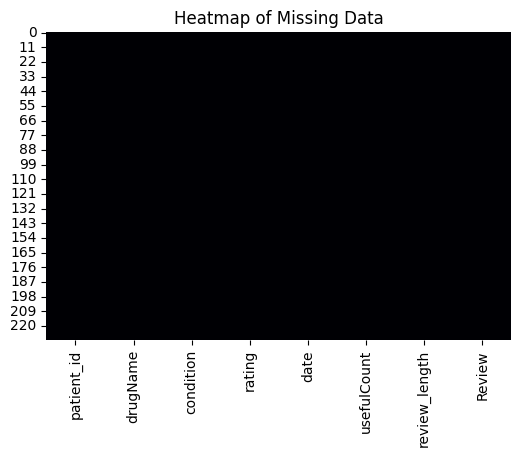

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import squarify
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for formatting
headline1 = "\n----------|"
headline2 = "|----------\n"

data = pd.read_csv('data/drug_review.csv')

# drop empty column
data.drop(columns=['Unnamed: 7'], inplace=True)

# heatmap of missing values
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()

In [2]:
# summary statistics of dataset

# to print datatypes
print(f"{headline1} Datatypes {headline2}{data.dtypes}")

# # of rows
print(f"{headline1} Rows {headline2}{len(data.axes[0])}")

# # of columns
print(f"{headline1} Columns {headline2}{len(data.axes[1])}")

# # of missing values
print(f"{headline1} Missing Data Count {headline2}{data.isnull().sum()}")

# for loop to go through each column and display numerical statistics or categorical statistics
# for column in data.columns:
#     if data[column].dtype == 'int64':
#         print(f"{headline1} {column} {headline2}")
#         print(f"median: {data[column].median()}") # median added to .describe since it was specified in project instructions
#         print(data[column].describe())
#     else:
#         print(f"{headline1} {column} {headline2}")
#         print(data[column].value_counts())



----------| Datatypes |----------
patient_id        int64
drugName         object
condition        object
rating            int64
date             object
usefulCount       int64
review_length     int64
Review           object
dtype: object

----------| Rows |----------
231

----------| Columns |----------
8

----------| Missing Data Count |----------
patient_id       0
drugName         0
condition        0
rating           0
date             0
usefulCount      0
review_length    0
Review           0
dtype: int64


In [3]:
data.head()

,patient_id,drugName,condition,rating,date,usefulCount,review_length,Review
0,89879,Cyclosporine,keratoconjunctivitis sicca,2,20-Apr-13,69,147,"""i have used restasis for about a year now and..."
1,143975,Etonogestrel,birth control,7,7-Aug-16,4,136,"""my experience has been somewhat mixed. i have..."
2,106473,Implanon,birth control,1,11-May-16,6,140,"""this is my second implanon would not recommen..."
3,184526,Hydroxyzine,anxiety,10,19-Mar-12,124,104,"""i recommend taking as prescribed, and the bot..."
4,91587,Dalfampridine,multiple sclerosis,9,1-Aug-10,101,74,"""i have been on ampyra for 5 days and have bee..."


In [4]:
# getting the top 5 highest rated drugs
top_5_drugs = data.sort_values(by='rating', ascending=False).head(5)

print(top_5_drugs[['drugName','rating']])

# ^^^ This work but I don't think I needed to do it because 'top 5' meant first 5.

       drugName  rating
3   Hydroxyzine      10
37  Propranolol      10
32      Victoza      10
18       Mirena      10
19      Imitrex      10


### Categorical Visualization

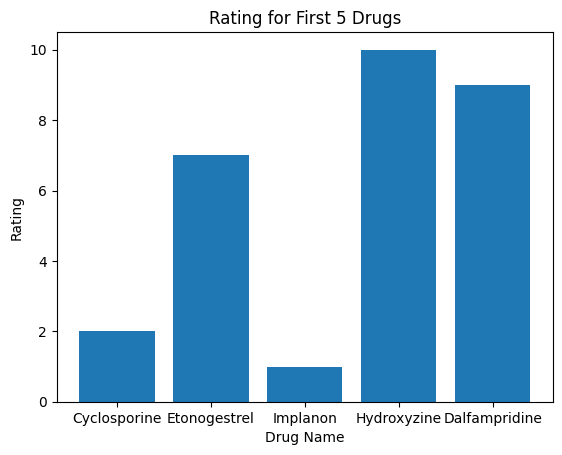

In [5]:
# bar chart
top_5_drugs = data.head(5)

plt.bar(top_5_drugs['drugName'], top_5_drugs['rating'])
plt.title('Rating for First 5 Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Rating')
plt.show()

### Word Cloud

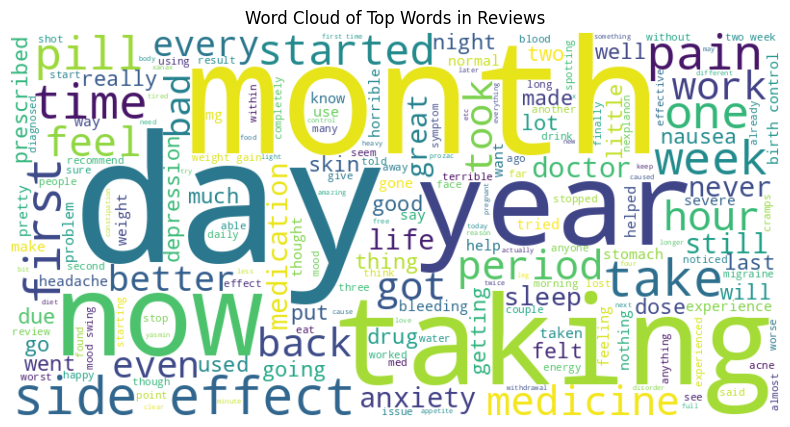

In [6]:
all_reviews = data['Review'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words in Reviews')
plt.show()

## Finding Themes

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Review'])

#KMeans Clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

themes = {
    0: "Positive",
    1: "Negative",
    2: "Neutral"
}

data['Theme'] = data['Cluster'].map(themes)

### Heatmap

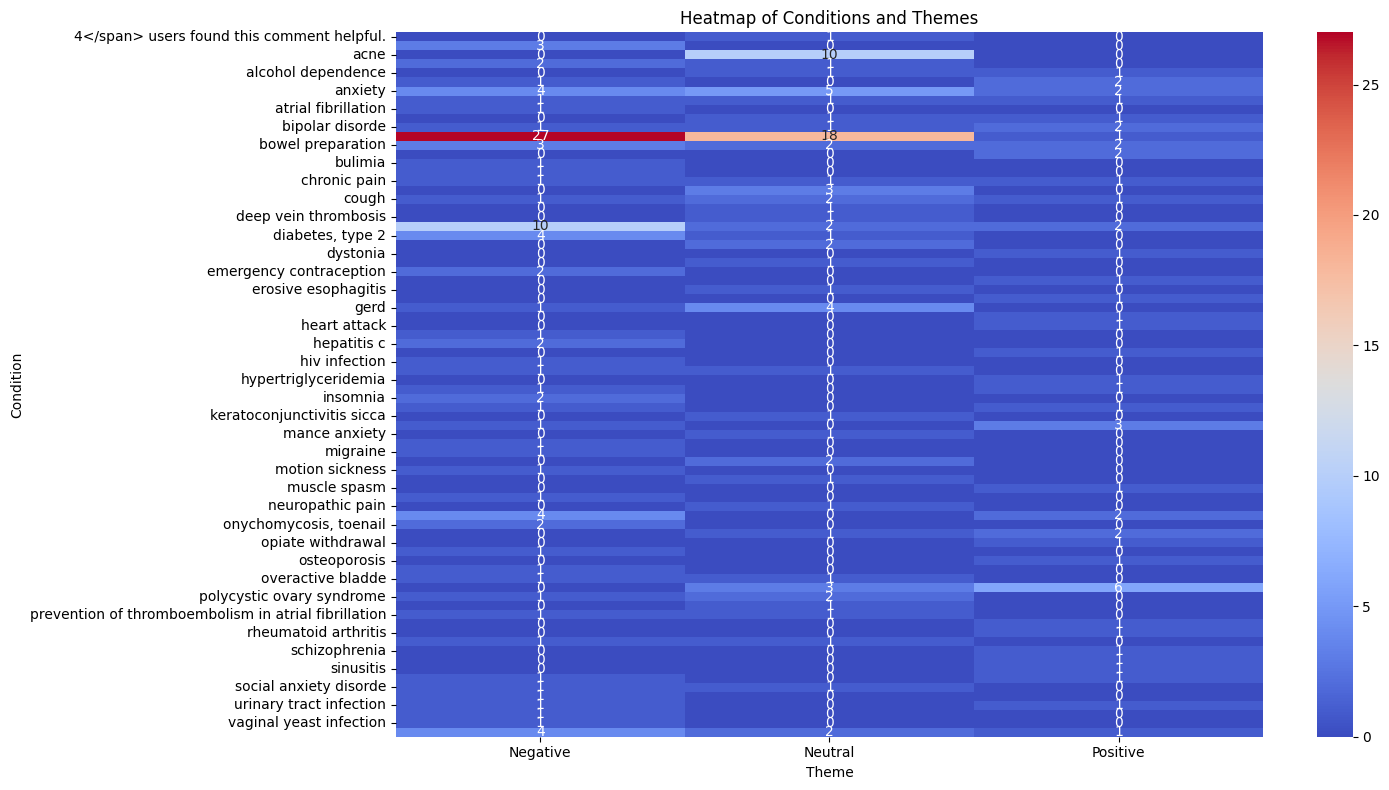

In [ ]:
heatmap_data = pd.crosstab(data['condition'], data['Theme'])

# heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="coolwarm")
plt.title("Heatmap of Conditions and Themes")
plt.ylabel("Condition")
plt.xlabel("Theme")
plt.tight_layout()
plt.show()


### Treemap

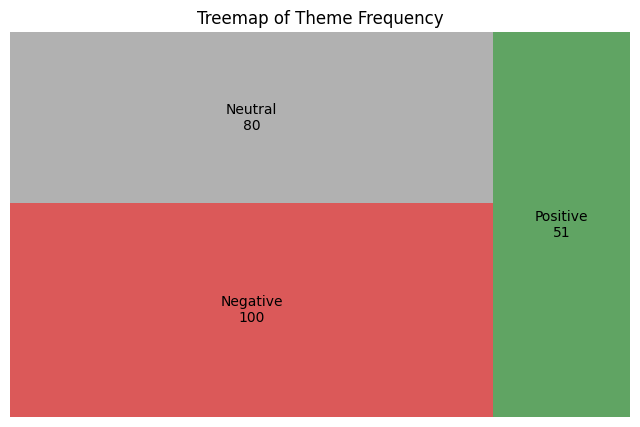

In [ ]:
treemap_data = data['Theme'].value_counts().reset_index()
treemap_data.columns = ['Theme', 'Frequency']

# Format labels to include both Theme and Frequency
treemap_data['Label'] = treemap_data.apply(lambda x: f"{x['Theme']}\n{x['Frequency']}", axis=1)

# Plot the treemap
plt.figure(figsize=(8, 5))
squarify.plot(
    sizes=treemap_data['Frequency'], 
    label=treemap_data['Label'], 
    alpha=0.8, 
    color=['#D32F2F', '#9E9E9E', '#388E3C']
)
plt.title('Treemap of Theme Frequency')
plt.axis('off')
plt.show()
